In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [3]:
%cd C:\Users\Dev\Desktop\Kaggle\Salinity

# Changing the file read location to the location of the dataset
df = pd.read_csv('bottle.csv')
df_binary = df[['Salnty', 'T_degC']]

# Taking only the selected two attributes from the dataset
df_binary.columns = ['Sal', 'Temp']

# Renaming the columns for easier writing of the code
df_binary.head()

# Displaying only the 1st rows along with the column names


C:\Users\Dev\Desktop\Kaggle\Salinity


C:\Users\Kareeshini\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (47,73) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Sal,Temp
0,33.440,10.50
1,33.440,10.46
2,33.437,10.46
3,33.420,10.45
4,33.421,10.45


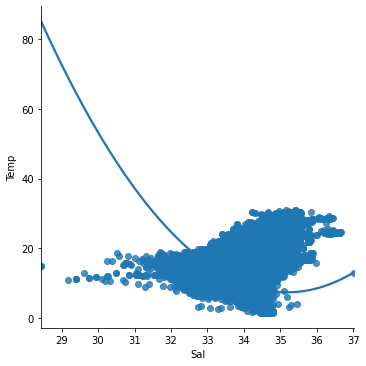

In [4]:
sns.lmplot(x ="Sal", y ="Temp", data = df_binary, order = 2, ci = None)

# Plotting the data scatter


In [5]:
# Eliminating NaN or missing input numbers
df_binary.fillna(method ='ffill', inplace = True)


C:\Users\Kareeshini\anaconda3\lib\site-packages\pandas\core\frame.py:4317: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [6]:
X = np.array(df_binary['Sal']).reshape(-1, 1)
y = np.array(df_binary['Temp']).reshape(-1, 1)

# Separating the data into independent and dependent variables
# Converting each dataframe into a numpy array
# since each dataframe contains only one column
df_binary.dropna(inplace = True)

# Dropping any rows with Nan values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Splitting the data into training and testing data
regr = LinearRegression()

regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))


<ipython-input-6-e05c647b0381>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_binary.dropna(inplace = True)


0.20583565505955004


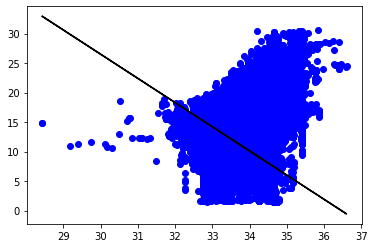

In [7]:
y_pred = regr.predict(X_test)
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')

plt.show()
# Data scatter of predicted values


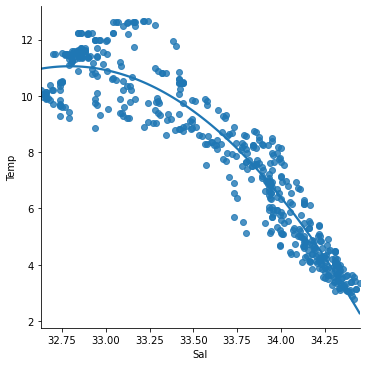

In [8]:
df_binary500 = df_binary[:][:500]

# Selecting the 1st 500 rows of the data
sns.lmplot(x ="Sal", y ="Temp", data = df_binary500,
							order = 2, ci = None)


In [9]:
df_binary500.fillna(method ='ffill', inplace = True)

X = np.array(df_binary500['Sal']).reshape(-1, 1)
y = np.array(df_binary500['Temp']).reshape(-1, 1)

df_binary500.dropna(inplace = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

regr = LinearRegression()
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))


0.8592984506387122


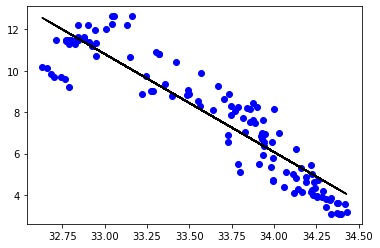

In [10]:
y_pred = regr.predict(X_test)
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')

plt.show()
